In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [3]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 6E28-A8C8

 Directory of c:\Users\Ferry Marcellus\Desktop\Hacktiv8\_Phase 2\Final Project\In_progress\offline_copy

21/10/2022  19:15    <DIR>          .
21/10/2022  19:15    <DIR>          ..
17/01/2022  20:12        36.127.865 articles.csv
17/01/2022  20:12       207.135.859 customers.csv
21/10/2022  19:31           142.867 final_project.ipynb
21/10/2022  18:42    <DIR>          images
17/01/2022  21:14     3.488.002.253 transactions_train.csv
               4 File(s)  3.731.408.844 bytes
               3 Dir(s)  61.307.535.360 bytes free


In [4]:
df_articles = pd.read_csv('articles.csv')
df_customers = pd.read_csv('customers.csv')
df_transaction = pd.read_csv('transactions_train.csv')
pd.set_option('display.max_columns', None)

Transaction adalah penghubung di mana ada article_id dan customer_id

articles -> transaction <- customers

In [5]:
df_articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [6]:
df_customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [7]:
df_transaction.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [8]:
# Join Transaction with customers

df_transaction.join(df_customers.set_index('customer_id'), on='customer_id')

,t_dat,customer_id,article_id,price,sales_channel_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
...,...,...,...,...,...,...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,1.0,1.0,ACTIVE,Regularly,32.0,2695d7727a61ed8011f93de47dc9445017596302bd0592...
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2,1.0,1.0,ACTIVE,Regularly,32.0,2695d7727a61ed8011f93de47dc9445017596302bd0592...
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1,NaN,NaN,ACTIVE,NONE,67.0,a9c9c4db44316f6e62ea17ba5e8b84c1ec3ebeddb3f299...
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1,1.0,1.0,ACTIVE,Regularly,21.0,3737324e2574c3bde9ef00336bc767781dbed7e828d51a...


In [9]:
# Join Transaction with articles

df_transaction.join(df_articles.set_index('article_id'), on='article_id')

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,663713,Atlanta Push Body Harlow,283,Underwear body,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1338,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,541518,Rae Push (Melbourne) 2p,306,Bra,Underwear,1010016,Solid,51,Light Pink,1,Dusty Light,4,Pink,1334,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up bras with underwired, moulded, pa..."
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,505221,Inca Jumper,252,Sweater,Garment Upper body,1010010,Melange,52,Pink,2,Medium Dusty,4,Pink,5963,Tops Knitwear DS,D,Divided,2,Divided,58,Divided Selected,1003,Knitwear,Jumper in rib-knit cotton with hard-worn detai...
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,685687,W YODA KNIT OL OFFER,252,Sweater,Garment Upper body,1010010,Melange,52,Pink,7,Medium,4,Pink,3090,Campaigns,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1023,Special Offers,V-neck knitted jumper with long sleeves and ri...
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,685687,W YODA KNIT OL OFFER,252,Sweater,Garment Upper body,1010010,Melange,93,Dark Green,4,Dark,19,Green,3090,Campaigns,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1023,Special Offers,V-neck knitted jumper with long sleeves and ri...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,929511,POPPY PU SHIRT DRESS,265,Dress,Garment Full body,1010001,All over pattern,9,Black,4,Dark,5,Black,1344,Dresses,D,Divided,2,Divided,53,Divided Collection,1013,Dresses Ladies,Short shirt dress in soft imitation leather wi...
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2,891322,FENNEL SHIRT DRESS,-1,Unknown,Unknown,1010016,Solid,9,Black,4,Dark,5,Black,1344,Dresses,D,Divided,2,Divided,53,Divided Collection,1013,Dresses Ladies,Short shirt dress in a cotton weave with a col...
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1,918325,Winter shopper,66,Bag,Accessories,1010002,Application/3D,9,Black,4,Dark,5,Black,3209,Bags,C,Ladies Accessories,1,Ladieswear,65,Womens Big accessories,1019,Accessories,"Lightly padded, quilted shopper in a recycled ..."
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1,833459,Class Aligator Ring Pack,79,Ring,Accessories,1010016,Solid,3,Silver,3,Light,15,Metal,4344,Jewellery,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,Thin metal rings in various designs.


In [10]:
df_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [11]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [12]:
len(df_customers['age'][df_customers['age'].isnull()])

15861

In [13]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [14]:
df_transaction['t_dat'] = pd.to_datetime(df_transaction['t_dat'])

In [15]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        int64         
 3   price             float64       
 4   sales_channel_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.2+ GB


### Check Missing Values

In [16]:
df_articles.isnull().count()

article_id                      105542
product_code                    105542
prod_name                       105542
product_type_no                 105542
product_type_name               105542
product_group_name              105542
graphical_appearance_no         105542
graphical_appearance_name       105542
colour_group_code               105542
colour_group_name               105542
perceived_colour_value_id       105542
perceived_colour_value_name     105542
perceived_colour_master_id      105542
perceived_colour_master_name    105542
department_no                   105542
department_name                 105542
index_code                      105542
index_name                      105542
index_group_no                  105542
index_group_name                105542
section_no                      105542
section_name                    105542
garment_group_no                105542
garment_group_name              105542
detail_desc                     105542
dtype: int64

In [17]:
df_customers.isnull().count()

customer_id               1371980
FN                        1371980
Active                    1371980
club_member_status        1371980
fashion_news_frequency    1371980
age                       1371980
postal_code               1371980
dtype: int64

In [18]:
df_transaction.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

### Check duplicated

In [19]:
len(df_articles.duplicated())

105542

In [20]:
len(df_customers.duplicated())

1371980

## Calculating Recency

In [21]:
df_recency = df_transaction.groupby(by='customer_id', as_index=False)['t_dat'].max()
df_recency.columns = ['customer_id', 'lastpurchasedate']
recent_date = df_recency['lastpurchasedate'].max()
df_recency['recency'] = df_recency['lastpurchasedate'].apply(
    lambda x: (recent_date - x).days)

df_recency.head()

,customer_id,lastpurchasedate,recency
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2020-09-05,17
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,2020-07-08,76
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,2020-09-15,7
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,2019-06-09,471
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,2020-08-12,41


### Calculating Frequency

In [22]:
df_frequency = df_transaction.groupby(by='customer_id', as_index=False)['t_dat'].count()
df_frequency.columns = ['customer_id', 'frequency']
df_frequency.head()

,customer_id,frequency
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,21
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,86
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,18
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,2
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,13


### Calculating Monetary

In [23]:
df_monetary = df_transaction.groupby('customer_id', as_index=False)['price'].count()
df_monetary.columns = ['customer_id', 'monetary']
df_monetary.head()

,customer_id,monetary
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,21
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,86
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,18
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,2
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,13


## Merging RFM

In [24]:
df_rf = df_recency.merge(df_frequency, on='customer_id')
df_rfm = df_rf.merge(df_monetary, on='customer_id').drop(columns='lastpurchasedate')

In [25]:
df_rfm

,customer_id,recency,frequency,monetary
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,17,21,21
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,76,86,86
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,7,18,18
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,471,2,2
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,41,13,13
...,...,...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,16,51,51
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,35,84,84
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,13,45,45
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,92,7,7


### Exploratory Data Analysis

### Data Preprocessing

In [26]:
# defining plot function
def plot_dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

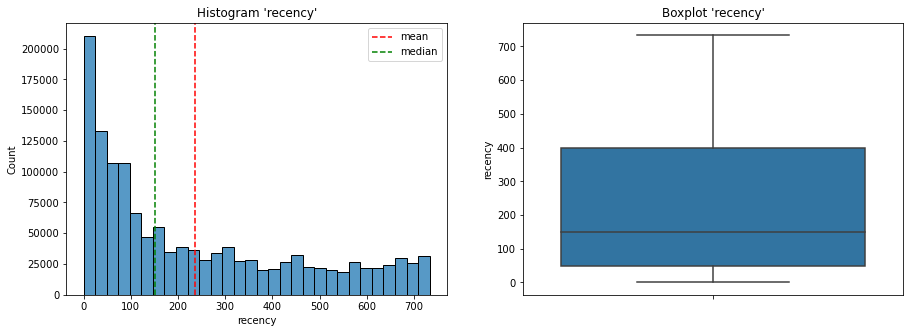

recency Kurtosis: -0.6757738004166298
recency Skewness: 0.8015839691970799
Columns 'recency' right skewed


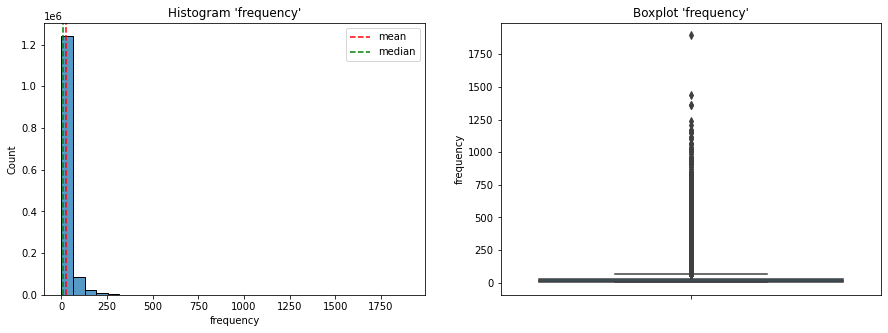

frequency Kurtosis: 56.24939720976781
frequency Skewness: 5.243189357560082
Columns 'frequency' right skewed


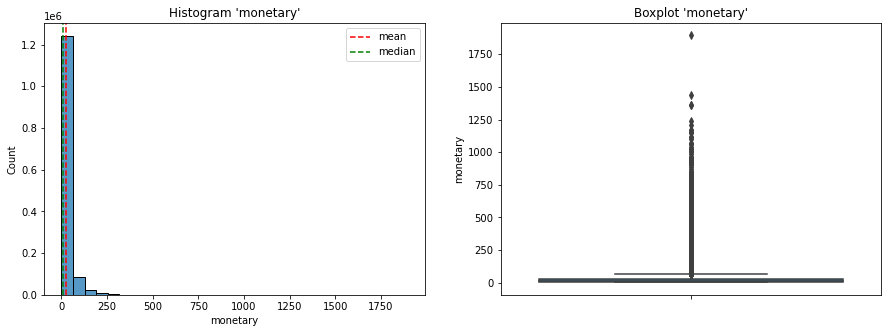

monetary Kurtosis: 56.24939720976781
monetary Skewness: 5.243189357560082
Columns 'monetary' right skewed


In [27]:
# checking for data skewness and outlier
for col in ['recency','frequency','monetary']:
    plot_dist(df_rfm,col)

In [35]:
# Defining features
df_rfm_x= df_rfm[['recency','frequency','monetary']]
# scaling the data
scaler=RobustScaler()
x=scaler.fit_transform(df_rfm_x)
x=pd.DataFrame(x, columns=df_rfm_x.columns)
x

,recency,frequency,monetary
0,-0.382857,0.500000,0.500000
1,-0.214286,3.208333,3.208333
2,-0.411429,0.375000,0.375000
3,0.914286,-0.291667,-0.291667
4,-0.314286,0.166667,0.166667
...,...,...,...
1362276,-0.385714,1.750000,1.750000
1362277,-0.331429,3.125000,3.125000
1362278,-0.394286,1.500000,1.500000
1362279,-0.168571,-0.083333,-0.083333


### Model Definition & Training

explain model here

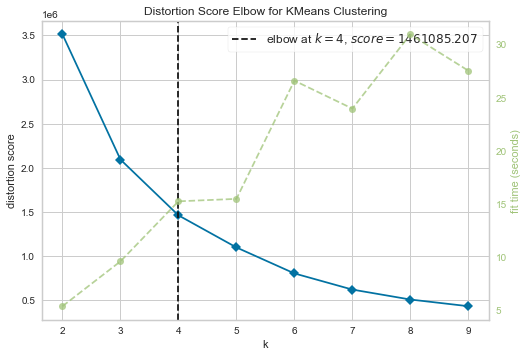

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
# defining models
km_model = KMeans(algorithm='lloyd',random_state=32)
# Showing elbow point
Elbow_M = KElbowVisualizer(km_model, k=9)
Elbow_M.fit(x)
Elbow_M.show()

It is found that the elbow value of the model is at 4. this will be set as the number of clusters for the model.

In [53]:
# redefining model
km_model = KMeans(algorithm='lloyd',n_clusters=4,random_state=32)

In [58]:
# Training the model
km_model.fit_predict(x)

array([0, 1, 0, ..., 3, 0, 0])

In [59]:
# reducing data to 2 dimensions for visualization
pca=PCA(n_components=2)
xp=pca.fit_transform(x)
xp

array([[-0.07193546, -0.63421617],
       [ 3.71986545, -0.0678231 ],
       [-0.24477719, -0.68103563],
       ...,
       [ 1.33578353, -0.49835645],
       [-0.91471897, -0.50697676],
       [-1.32613709,  0.02738194]])

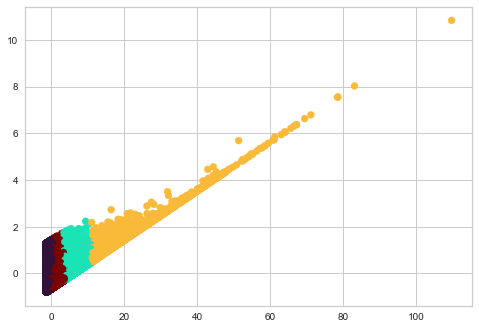

In [62]:
# plotting model labels
plt.scatter(xp[:,0],xp[:,1],c=km_model.labels_,cmap='turbo')
plt.show()

In [66]:
# defining prediction data
y_pred=km_model.labels_
y_pred_df=pd.DataFrame(y_pred)
y_pred_df=y_pred_df.reset_index(drop=True)

dfa=pd.concat([df_rfm,y_pred_df],axis=1)
dfa.rename({0:'category'},axis=1,inplace=True)
dfa

,customer_id,recency,frequency,monetary,category
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,17,21,21,0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,76,86,86,1
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,7,18,18,0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,471,2,2,0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,41,13,13,0
...,...,...,...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,16,51,51,3
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,35,84,84,3
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,13,45,45,3
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,92,7,7,0


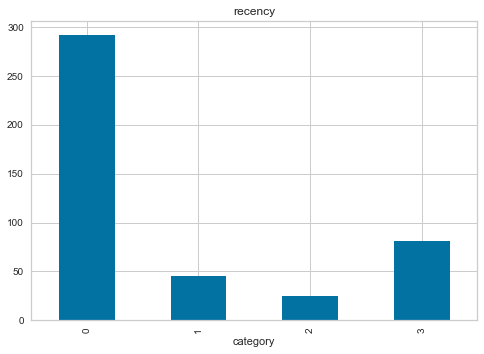

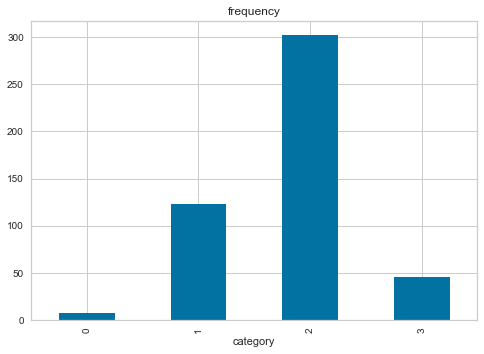

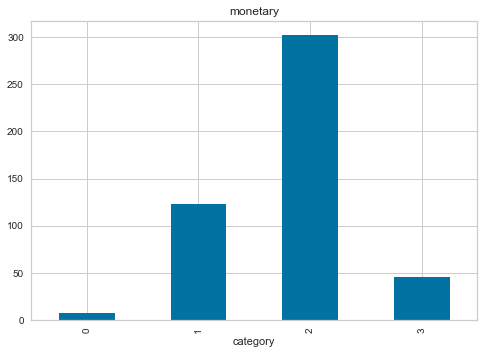

In [67]:
for col in ['recency','frequency','monetary']:
    dfa.groupby('category')[col].mean().plot(kind='bar')
    plt.title(col)
    plt.show()